In [73]:
import probscale
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from collections import namedtuple

In [74]:
# Reading the data 
astro_df = pd.read_csv("./dataset.csv")
astro_df

/var/folders/dg/7l5zbtrd01jd_n8417c8rjw40000gn/T/ipykernel_38647/2666343128.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  astro_df = pd.read_csv("./dataset.csv")


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


<h1>Data Cleaning</h1>

<h2>Step 1: Drop Duplicates</h2>

In [75]:
astro_df = astro_df.drop_duplicates()
astro_df

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


<h2>Step 2: Rename Columns for better understanding</h2>

In [76]:
# Listing the columns
astro_df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'rms'],
      dtype='object')

In [77]:
# Feature names as explained in the data source : https://ssd.jpl.nasa.gov/tools/sbdb_query.html
astro_df = astro_df.rename(columns = {
    'pdes': 'primary_designation',
    'name': 'iau name', # International Astronomical Union Name
    'neo': 'neo_flag', # Near Earth Object 
    'pha': 'pha_flag', # Potential Hazhardous Asteroids
    'H': 'absolute_magnitude',
    'e':'eccentricity',
    'a':'semi_major_axis',
    'q':'perihelion_distance',
    'i':'inclination',
    'n': 'mean_motion',
    'tp': 'time_of_perihelion_passage',
    'class':'classification',
    'per':'period_days',
    'per_y':'period_years'
}).copy()
astro_df

,id,spkid,full_name,primary_designation,iau name,prefix,neo_flag,pha_flag,absolute_magnitude,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,classification,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.400,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.200,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.330,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.000,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.900,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,NaN,NaN,N,N,17.135,NaN,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,NaN,NaN,N,N,18.500,NaN,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,NaN,NaN,Y,Y,20.400,NaN,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,NaN,NaN,N,N,18.071,NaN,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


<h2>Step 3: Remove columns which are not useful</h2>

In [78]:
# Listing all the columns
astro_df.columns

Index(['id', 'spkid', 'full_name', 'primary_designation', 'iau name', 'prefix',
       'neo_flag', 'pha_flag', 'absolute_magnitude', 'diameter', 'albedo',
       'diameter_sigma', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal',
       'equinox', 'eccentricity', 'semi_major_axis', 'perihelion_distance',
       'inclination', 'om', 'w', 'ma', 'ad', 'mean_motion',
       'time_of_perihelion_passage', 'tp_cal', 'period_days', 'period_years',
       'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i',
       'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp',
       'sigma_per', 'classification', 'rms'],
      dtype='object')

In [79]:
# Dropping columns with redundant data and which arent important for our problem statement
astro_df = astro_df.drop(columns=["om","w", "ma", 'ad','iau name', 'prefix','diameter', 'diameter_sigma','albedo', 'sigma_om', 'sigma_ma', 'sigma_w', 'sigma_ad', 'rms'])
astro_df

,id,spkid,full_name,primary_designation,neo_flag,pha_flag,absolute_magnitude,orbit_id,epoch,epoch_mjd,...,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_n,sigma_tp,sigma_per,classification
0,a0000001,2000001,1 Ceres,1,N,N,3.400,JPL 47,2458600.5,58600,...,1.594780,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,1.196500e-12,3.782900e-08,9.415900e-09,MBA
1,a0000002,2000002,2 Pallas,2,N,N,4.200,JPL 37,2459000.5,59000,...,1.234290,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,4.653600e-10,4.078700e-05,3.680700e-06,MBA
2,a0000003,2000003,3 Juno,3,N,N,5.330,JPL 112,2459000.5,59000,...,1.034290,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,4.413400e-10,3.528800e-05,3.107200e-06,MBA
3,a0000004,2000004,4 Vesta,4,N,N,3.000,JPL 35,2458600.5,58600,...,1.139480,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,2.612500e-10,4.103700e-06,1.274900e-06,MBA
4,a0000005,2000005,5 Astraea,5,N,N,6.900,JPL 114,2459000.5,59000,...,1.095750,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,5.522700e-10,3.474300e-05,3.490500e-06,MBA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,N,N,17.135,JPL 5,2437203.5,37203,...,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,N,N,18.500,8,2459000.5,59000,...,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,1.563500e-05,3.346100e-09,4.690200e-04,1.578500e-05,MBA
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,Y,Y,20.400,17,2459000.5,59000,...,0.035589,13.850093,6.636800e-08,9.925600e-08,1.687100e-07,1.853300e-05,1.101600e-08,2.830600e-04,9.127500e-05,APO
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,N,N,18.071,JPL 3,2441956.5,41956,...,0.893896,347.877506,3.169800e-02,5.966200e-01,5.478400e-01,5.448800e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA


In [80]:
astro_df.columns

Index(['id', 'spkid', 'full_name', 'primary_designation', 'neo_flag',
       'pha_flag', 'absolute_magnitude', 'orbit_id', 'epoch', 'epoch_mjd',
       'epoch_cal', 'equinox', 'eccentricity', 'semi_major_axis',
       'perihelion_distance', 'inclination', 'mean_motion',
       'time_of_perihelion_passage', 'tp_cal', 'period_days', 'period_years',
       'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i',
       'sigma_n', 'sigma_tp', 'sigma_per', 'classification'],
      dtype='object')

<h2> Step 4: Remove the rows with missing values </h2>

In [81]:
# Checking number of null values
astro_df.isna().sum()

id                                0
spkid                             0
full_name                         0
primary_designation               0
neo_flag                          4
pha_flag                      19921
absolute_magnitude             6263
orbit_id                          0
epoch                             0
epoch_mjd                         0
epoch_cal                         0
equinox                           0
eccentricity                      0
semi_major_axis                   0
perihelion_distance               0
inclination                       0
mean_motion                       0
time_of_perihelion_passage        0
tp_cal                            0
period_days                       4
period_years                      1
moid                          19921
moid_ld                         127
sigma_e                       19922
sigma_a                       19922
sigma_q                       19922
sigma_i                       19922
sigma_n                     

In [82]:
# Removing rows with either pha flag or neo flag as null, as they are one of our category classifications
astro_df = astro_df.dropna(subset=["pha_flag","neo_flag"], how="any")
astro_df = astro_df.reset_index(drop=True)
astro_df

,id,spkid,full_name,primary_designation,neo_flag,pha_flag,absolute_magnitude,orbit_id,epoch,epoch_mjd,...,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_n,sigma_tp,sigma_per,classification
0,a0000001,2000001,1 Ceres,1,N,N,3.400,JPL 47,2458600.5,58600,...,1.594780,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,1.196500e-12,3.782900e-08,9.415900e-09,MBA
1,a0000002,2000002,2 Pallas,2,N,N,4.200,JPL 37,2459000.5,59000,...,1.234290,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,4.653600e-10,4.078700e-05,3.680700e-06,MBA
2,a0000003,2000003,3 Juno,3,N,N,5.330,JPL 112,2459000.5,59000,...,1.034290,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,4.413400e-10,3.528800e-05,3.107200e-06,MBA
3,a0000004,2000004,4 Vesta,4,N,N,3.000,JPL 35,2458600.5,58600,...,1.139480,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,2.612500e-10,4.103700e-06,1.274900e-06,MBA
4,a0000005,2000005,5 Astraea,5,N,N,6.900,JPL 114,2459000.5,59000,...,1.095750,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,5.522700e-10,3.474300e-05,3.490500e-06,MBA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938594,bPLS6013,3246801,(6013 P-L),6013 P-L,N,N,17.135,JPL 5,2437203.5,37203,...,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA
938595,bPLS6331,3246834,(6331 P-L),6331 P-L,N,N,18.500,8,2459000.5,59000,...,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,1.563500e-05,3.346100e-09,4.690200e-04,1.578500e-05,MBA
938596,bPLS6344,3013075,(6344 P-L),6344 P-L,Y,Y,20.400,17,2459000.5,59000,...,0.035589,13.850093,6.636800e-08,9.925600e-08,1.687100e-07,1.853300e-05,1.101600e-08,2.830600e-04,9.127500e-05,APO
938597,bT2S2060,3246457,(2060 T-2),2060 T-2,N,N,18.071,JPL 3,2441956.5,41956,...,0.893896,347.877506,3.169800e-02,5.966200e-01,5.478400e-01,5.448800e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA


<h2>Step 5: Fill the missing values in columns </h2>

In [83]:
# Filling missing values with mean and interpolation
astro_df['absolute_magnitude'].fillna(int(astro_df['absolute_magnitude'].mean()), inplace=True)
astro_df['sigma_e'] = astro_df['sigma_e'].interpolate(method="linear")
astro_df['sigma_a'] = astro_df['sigma_a'].interpolate(method="linear")
astro_df['sigma_tp'] = astro_df['sigma_tp'].interpolate(method="linear")
astro_df['sigma_q'] = astro_df['sigma_q'].interpolate(method="linear")
astro_df['sigma_i'] = astro_df['sigma_i'].interpolate(method="linear")
astro_df['sigma_n'] = astro_df['sigma_n'].interpolate(method="linear")
astro_df['sigma_per'] = astro_df['sigma_per'].interpolate(method="linear")

astro_df.isna().sum()


id                            0
spkid                         0
full_name                     0
primary_designation           0
neo_flag                      0
pha_flag                      0
absolute_magnitude            0
orbit_id                      0
epoch                         0
epoch_mjd                     0
epoch_cal                     0
equinox                       0
eccentricity                  0
semi_major_axis               0
perihelion_distance           0
inclination                   0
mean_motion                   0
time_of_perihelion_passage    0
tp_cal                        0
period_days                   0
period_years                  0
moid                          0
moid_ld                       0
sigma_e                       0
sigma_a                       0
sigma_q                       0
sigma_i                       0
sigma_n                       0
sigma_tp                      0
sigma_per                     0
classification                0
dtype: i

<h2> Step 6: Correcting Data Types of Columns</h2>


In [84]:
# Listing the data types of columns
astro_df.dtypes

id                             object
spkid                           int64
full_name                      object
primary_designation            object
neo_flag                       object
pha_flag                       object
absolute_magnitude            float64
orbit_id                       object
epoch                         float64
epoch_mjd                       int64
epoch_cal                     float64
equinox                        object
eccentricity                  float64
semi_major_axis               float64
perihelion_distance           float64
inclination                   float64
mean_motion                   float64
time_of_perihelion_passage    float64
tp_cal                        float64
period_days                   float64
period_years                  float64
moid                          float64
moid_ld                       float64
sigma_e                       float64
sigma_a                       float64
sigma_q                       float64
sigma_i     

In [85]:
# Converting objects to strings for further operations
astro_df['full_name'] = astro_df['full_name'].astype('string')
astro_df['primary_designation'] = astro_df['primary_designation'].astype('string')
astro_df.dtypes


id                             object
spkid                           int64
full_name                      string
primary_designation            string
neo_flag                       object
pha_flag                       object
absolute_magnitude            float64
orbit_id                       object
epoch                         float64
epoch_mjd                       int64
epoch_cal                     float64
equinox                        object
eccentricity                  float64
semi_major_axis               float64
perihelion_distance           float64
inclination                   float64
mean_motion                   float64
time_of_perihelion_passage    float64
tp_cal                        float64
period_days                   float64
period_years                  float64
moid                          float64
moid_ld                       float64
sigma_e                       float64
sigma_a                       float64
sigma_q                       float64
sigma_i     

<h2> Step 7: Correcting the values in columns </h2>

In [86]:
# Correcting fulling my removing the index mentioned in it
astro_df['full_name'] = astro_df['full_name'].str.strip().str.split(' ',1, expand=True)[1]
astro_df.head(20)

,id,spkid,full_name,primary_designation,neo_flag,pha_flag,absolute_magnitude,orbit_id,epoch,epoch_mjd,...,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_n,sigma_tp,sigma_per,classification
0,a0000001,2000001,Ceres,1,N,N,3.40,JPL 47,2458600.5,58600,...,1.594780,620.640533,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,1.196500e-12,3.782900e-08,9.415900e-09,MBA
1,a0000002,2000002,Pallas,2,N,N,4.20,JPL 37,2459000.5,59000,...,1.234290,480.348639,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,4.653600e-10,4.078700e-05,3.680700e-06,MBA
2,a0000003,2000003,Juno,3,N,N,5.33,JPL 112,2459000.5,59000,...,1.034290,402.514639,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,4.413400e-10,3.528800e-05,3.107200e-06,MBA
3,a0000004,2000004,Vesta,4,N,N,3.00,JPL 35,2458600.5,58600,...,1.139480,443.451432,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,2.612500e-10,4.103700e-06,1.274900e-06,MBA
4,a0000005,2000005,Astraea,5,N,N,6.90,JPL 114,2459000.5,59000,...,1.095750,426.433027,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,5.522700e-10,3.474300e-05,3.490500e-06,MBA
5,a0000006,2000006,Hebe,6,N,N,5.80,JPL 89,2459000.5,59000,...,0.973673,378.924321,1.978600e-08,2.748200e-09,4.811900e-08,2.191800e-06,4.438800e-10,2.875400e-05,2.344500e-06,MBA
6,a0000007,2000007,Iris,7,N,N,5.60,110,2459000.5,59000,...,0.850693,331.064195,1.991900e-08,2.007500e-09,4.748800e-08,2.582500e-06,3.370100e-10,2.662700e-05,1.699400e-06,MBA
7,a0000008,2000008,Flora,8,N,N,6.50,JPL 118,2459000.5,59000,...,0.875980,340.905137,2.364400e-08,2.308400e-09,5.176000e-08,3.240300e-06,4.746200e-10,4.018700e-05,1.876500e-06,MBA
8,a0000009,2000009,Metis,9,N,N,6.30,JPL 116,2459000.5,59000,...,1.107110,430.853999,1.841400e-08,3.089300e-09,4.425800e-08,2.007400e-06,5.192700e-10,3.870700e-05,2.614600e-06,MBA
9,a0000010,2000010,Hygiea,10,N,N,5.50,JPL 96,2459000.5,59000,...,1.780300,692.839351,1.634600e-08,6.923600e-09,5.095200e-08,2.173400e-06,5.847400e-10,6.482900e-05,6.724400e-06,MBA


<h2>Step 8: Check for and Remove Outliers </h2>
<p>Reference: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/</p>

In [87]:
# Finding the interquantile range and removing the outliers outside of the range
Q3=astro_df['absolute_magnitude'].quantile(0.75)
Q1= astro_df['absolute_magnitude'].quantile(0.25)
print(Q3)
print(Q1)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_array = np.where(astro_df['absolute_magnitude'] >= upper)[0]
lower_array = np.where(astro_df['absolute_magnitude'] <= lower)[0]
 
Q3=astro_df['absolute_magnitude'].quantile(0.75)
Q1= astro_df['absolute_magnitude'].quantile(0.25)
print(Q3)
print(Q1)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_array = np.where(astro_df['absolute_magnitude'] >= upper)[0]
lower_array = np.where(astro_df['absolute_magnitude'] <= lower)[0]
# Removing the outliers
astro_df.drop(index=upper_array, inplace=True)
astro_df.drop(index=lower_array, inplace=True)
astro_df = astro_df.reset_index(drop=True)
 
# Print the new shape of the DataFrame
print("New Shape: ", astro_df.shape)
astro_df

17.7
16.0
17.7
16.0
New Shape:  (898924, 31)


,id,spkid,full_name,primary_designation,neo_flag,pha_flag,absolute_magnitude,orbit_id,epoch,epoch_mjd,...,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_n,sigma_tp,sigma_per,classification
0,a0000719,2000719,Albert (1911 MT),719,Y,N,15.400,JPL 214,2459000.5,59000,...,0.203482,79.189090,2.178400e-08,2.531300e-09,5.811600e-08,0.000003,3.309000e-10,0.000010,0.000002,AMO
1,a0000724,2000724,Hapag (1911 NC),724,N,N,13.800,JPL 29,2459000.5,59000,...,0.855046,332.758252,5.331500e-08,9.915300e-09,1.271500e-07,0.000005,1.553000e-09,0.000026,0.000009,MBA
2,a0000730,2000730,Athanasia (1912 OK),730,N,N,13.700,JPL 26,2459000.5,59000,...,0.841149,327.349956,3.325800e-08,6.819500e-09,7.607400e-08,0.000003,1.336600e-09,0.000041,0.000006,MBA
3,a0000843,2000843,Nicolaia (1916 AN),843,N,N,13.800,JPL 25,2459000.5,59000,...,0.799226,311.034782,3.973100e-08,5.608400e-09,9.143300e-08,0.000005,1.057300e-09,0.000032,0.000005,MBA
4,a0000878,2000878,Mildred (1916 f),878,N,N,14.700,JPL 29,2459000.5,59000,...,0.822394,320.051073,4.236900e-08,7.274900e-09,9.827200e-08,0.000004,1.257100e-09,0.000040,0.000006,MBA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898919,bPLS4847,3246764,P-L),4847 P-L,N,N,16.827,JPL 3,2437204.5,37204,...,1.071900,417.151323,3.817000e-02,9.454900e-01,8.239300e-01,8.209400,1.143900e-01,158.070000,854.590000,MBA
898920,bPLS6013,3246801,P-L),6013 P-L,N,N,17.135,JPL 5,2437203.5,37203,...,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000,1.652100e-01,130.970000,726.490000,MBA
898921,bPLS6331,3246834,P-L),6331 P-L,N,N,18.500,8,2459000.5,59000,...,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,0.000016,3.346100e-09,0.000469,0.000016,MBA
898922,bT2S2060,3246457,T-2),2060 T-2,N,N,18.071,JPL 3,2441956.5,41956,...,0.893896,347.877506,3.169800e-02,5.966200e-01,5.478400e-01,0.544880,1.016700e-01,38.984000,503.550000,MBA


In [88]:
Q3=astro_df['mean_motion'].quantile(0.75)
Q1= astro_df['mean_motion'].quantile(0.25)
print(Q3)
print(Q1)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
upper_array = np.where(astro_df['mean_motion'] >= upper)[0]
lower_array = np.where(astro_df['mean_motion'] <= lower)[0]
# Removing the outliers
astro_df.drop(index=upper_array, inplace=True)
astro_df.drop(index=lower_array, inplace=True)
astro_df = astro_df.reset_index(drop=True)

print("New Shape: ", astro_df.shape)
astro_df

0.2657752482995941
0.18978626421437927
New Shape:  (888462, 31)


,id,spkid,full_name,primary_designation,neo_flag,pha_flag,absolute_magnitude,orbit_id,epoch,epoch_mjd,...,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_n,sigma_tp,sigma_per,classification
0,a0000719,2000719,Albert (1911 MT),719,Y,N,15.400,JPL 214,2459000.5,59000,...,0.203482,79.189090,2.178400e-08,2.531300e-09,5.811600e-08,0.000003,3.309000e-10,0.000010,0.000002,AMO
1,a0000724,2000724,Hapag (1911 NC),724,N,N,13.800,JPL 29,2459000.5,59000,...,0.855046,332.758252,5.331500e-08,9.915300e-09,1.271500e-07,0.000005,1.553000e-09,0.000026,0.000009,MBA
2,a0000730,2000730,Athanasia (1912 OK),730,N,N,13.700,JPL 26,2459000.5,59000,...,0.841149,327.349956,3.325800e-08,6.819500e-09,7.607400e-08,0.000003,1.336600e-09,0.000041,0.000006,MBA
3,a0000843,2000843,Nicolaia (1916 AN),843,N,N,13.800,JPL 25,2459000.5,59000,...,0.799226,311.034782,3.973100e-08,5.608400e-09,9.143300e-08,0.000005,1.057300e-09,0.000032,0.000005,MBA
4,a0000878,2000878,Mildred (1916 f),878,N,N,14.700,JPL 29,2459000.5,59000,...,0.822394,320.051073,4.236900e-08,7.274900e-09,9.827200e-08,0.000004,1.257100e-09,0.000040,0.000006,MBA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888457,bPLS4847,3246764,P-L),4847 P-L,N,N,16.827,JPL 3,2437204.5,37204,...,1.071900,417.151323,3.817000e-02,9.454900e-01,8.239300e-01,8.209400,1.143900e-01,158.070000,854.590000,MBA
888458,bPLS6013,3246801,P-L),6013 P-L,N,N,17.135,JPL 5,2437203.5,37203,...,0.861979,335.456367,2.142200e-02,8.779900e-01,7.299800e-01,6.969000,1.652100e-01,130.970000,726.490000,MBA
888459,bPLS6331,3246834,P-L),6331 P-L,N,N,18.500,8,2459000.5,59000,...,0.671242,261.227249,2.642000e-07,1.885500e-08,6.256300e-07,0.000016,3.346100e-09,0.000469,0.000016,MBA
888460,bT2S2060,3246457,T-2),2060 T-2,N,N,18.071,JPL 3,2441956.5,41956,...,0.893896,347.877506,3.169800e-02,5.966200e-01,5.478400e-01,0.544880,1.016700e-01,38.984000,503.550000,MBA


<h2>Step 9: Encoding Categorical Data</h2>


In [89]:
# Categorisation based on factorization
astro_df['classification_numerical'] = pd.factorize(astro_df['classification'])[0]
astro_df['classification_numerical']

0         0
1         1
2         1
3         1
4         1
         ..
888457    1
888458    1
888459    1
888460    1
888461    1
Name: classification_numerical, Length: 888462, dtype: int64

In [90]:
astro_df['pha_flag_numerical'] = pd.factorize(astro_df['pha_flag'])[0]
astro_df['pha_flag_numerical'].unique()

array([0, 1])

In [91]:
astro_df['neo_flag_numerical'] = pd.factorize(astro_df['pha_flag'])[0]
astro_df['neo_flag_numerical'].unique()

array([0, 1])

<h2> Step 10: Add a new column using existing columns </h2>

In [92]:
# period_seconds is calculated to keep all columns in standard units.
astro_df['period_seconds'] = astro_df['period_days'] * 24 * 60 * 60

# Perihelion_Point and Aphelion_Point is calculated to find the nearest and farthest distance from the sun. 
# Formula from reference: https://www.astronomynotes.com/history/s7.htm
astro_df['perihelion_point'] = astro_df['semi_major_axis'] * (1 - astro_df['eccentricity'])
astro_df['aphelion_point'] = astro_df['semi_major_axis'] * (1 + astro_df['eccentricity'])
astro_df

,id,spkid,full_name,primary_designation,neo_flag,pha_flag,absolute_magnitude,orbit_id,epoch,epoch_mjd,...,sigma_n,sigma_tp,sigma_per,classification,classification_numerical,pha_flag_numerical,neo_flag_numerical,period_seconds,perihelion_point,aphelion_point
0,a0000719,2000719,Albert (1911 MT),719,Y,N,15.400,JPL 214,2459000.5,59000,...,3.309000e-10,0.000010,0.000002,AMO,0,0,0,1.352611e+08,1.196452,4.080752
1,a0000724,2000724,Hapag (1911 NC),724,N,N,13.800,JPL 29,2459000.5,59000,...,1.553000e-09,0.000026,0.000009,MBA,1,0,0,1.213574e+08,1.838690,3.070380
2,a0000730,2000730,Athanasia (1912 OK),730,N,N,13.700,JPL 26,2459000.5,59000,...,1.336600e-09,0.000041,0.000006,MBA,1,0,0,1.060805e+08,1.844977,2.642949
3,a0000843,2000843,Nicolaia (1916 AN),843,N,N,13.800,JPL 25,2459000.5,59000,...,1.057300e-09,0.000032,0.000005,MBA,1,0,0,1.085844e+08,1.801561,2.756709
4,a0000878,2000878,Mildred (1916 f),878,N,N,14.700,JPL 29,2459000.5,59000,...,1.257100e-09,0.000040,0.000006,MBA,1,0,0,1.144111e+08,1.824797,2.895116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888457,bPLS4847,3246764,P-L),4847 P-L,N,N,16.827,JPL 3,2437204.5,37204,...,1.143900e-01,158.070000,854.590000,MBA,1,0,0,1.416927e+08,2.072724,3.370468
888458,bPLS6013,3246801,P-L),6013 P-L,N,N,17.135,JPL 5,2437203.5,37203,...,1.652100e-01,130.970000,726.490000,MBA,1,0,0,1.087078e+08,1.856807,2.704916
888459,bPLS6331,3246834,P-L),6331 P-L,N,N,18.500,8,2459000.5,59000,...,3.346100e-09,0.000469,0.000016,MBA,1,0,0,1.125946e+08,1.674319,2.995502
888460,bT2S2060,3246457,T-2),2060 T-2,N,N,18.071,JPL 3,2441956.5,41956,...,1.016700e-01,38.984000,503.550000,MBA,1,0,0,1.153709e+08,1.893638,2.852636


<h2>Step 11: Interchanging Columns</h2>

In [93]:
astro_df.columns

Index(['id', 'spkid', 'full_name', 'primary_designation', 'neo_flag',
       'pha_flag', 'absolute_magnitude', 'orbit_id', 'epoch', 'epoch_mjd',
       'epoch_cal', 'equinox', 'eccentricity', 'semi_major_axis',
       'perihelion_distance', 'inclination', 'mean_motion',
       'time_of_perihelion_passage', 'tp_cal', 'period_days', 'period_years',
       'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i',
       'sigma_n', 'sigma_tp', 'sigma_per', 'classification',
       'classification_numerical', 'pha_flag_numerical', 'neo_flag_numerical',
       'period_seconds', 'perihelion_point', 'aphelion_point'],
      dtype='object')

In [94]:
# Moving categorical columns to the end, next to their numerical values
columns_in_order = ['id', 'spkid', 'full_name', 'primary_designation',
       'absolute_magnitude', 'orbit_id', 'epoch', 'epoch_mjd',
       'epoch_cal', 'equinox', 'eccentricity', 'semi_major_axis',
       'perihelion_distance', 'inclination', 'mean_motion',
       'time_of_perihelion_passage', 'tp_cal','period_seconds', 'period_days', 'period_years',
       'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i',
       'sigma_n', 'sigma_tp', 'sigma_per', 'perihelion_point', 'aphelion_point', 'classification',
       'classification_numerical', 'pha_flag', 'pha_flag_numerical','neo_flag','neo_flag_numerical']
astro_df=astro_df.reindex(columns=columns_in_order)
astro_df

,id,spkid,full_name,primary_designation,absolute_magnitude,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,...,sigma_tp,sigma_per,perihelion_point,aphelion_point,classification,classification_numerical,pha_flag,pha_flag_numerical,neo_flag,neo_flag_numerical
0,a0000719,2000719,Albert (1911 MT),719,15.400,JPL 214,2459000.5,59000,20200531.0,J2000,...,0.000010,0.000002,1.196452,4.080752,AMO,0,N,0,Y,0
1,a0000724,2000724,Hapag (1911 NC),724,13.800,JPL 29,2459000.5,59000,20200531.0,J2000,...,0.000026,0.000009,1.838690,3.070380,MBA,1,N,0,N,0
2,a0000730,2000730,Athanasia (1912 OK),730,13.700,JPL 26,2459000.5,59000,20200531.0,J2000,...,0.000041,0.000006,1.844977,2.642949,MBA,1,N,0,N,0
3,a0000843,2000843,Nicolaia (1916 AN),843,13.800,JPL 25,2459000.5,59000,20200531.0,J2000,...,0.000032,0.000005,1.801561,2.756709,MBA,1,N,0,N,0
4,a0000878,2000878,Mildred (1916 f),878,14.700,JPL 29,2459000.5,59000,20200531.0,J2000,...,0.000040,0.000006,1.824797,2.895116,MBA,1,N,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888457,bPLS4847,3246764,P-L),4847 P-L,16.827,JPL 3,2437204.5,37204,19600927.0,J2000,...,158.070000,854.590000,2.072724,3.370468,MBA,1,N,0,N,0
888458,bPLS6013,3246801,P-L),6013 P-L,17.135,JPL 5,2437203.5,37203,19600926.0,J2000,...,130.970000,726.490000,1.856807,2.704916,MBA,1,N,0,N,0
888459,bPLS6331,3246834,P-L),6331 P-L,18.500,8,2459000.5,59000,20200531.0,J2000,...,0.000469,0.000016,1.674319,2.995502,MBA,1,N,0,N,0
888460,bT2S2060,3246457,T-2),2060 T-2,18.071,JPL 3,2441956.5,41956,19731001.0,J2000,...,38.984000,503.550000,1.893638,2.852636,MBA,1,N,0,N,0


<h1>Exploratory Data Analysis </h1>

<H2>Step 1 : Statistical Analysis </H2>

In [95]:
astro_df.describe()

,spkid,absolute_magnitude,epoch,epoch_mjd,epoch_cal,eccentricity,semi_major_axis,perihelion_distance,inclination,mean_motion,...,sigma_q,sigma_i,sigma_n,sigma_tp,sigma_per,perihelion_point,aphelion_point,classification_numerical,pha_flag_numerical,neo_flag_numerical
count,8.884620e+05,888462.000000,8.884620e+05,888462.000000,8.884620e+05,888462.000000,888462.000000,888462.000000,888462.000000,888462.000000,...,8.884620e+05,8.884620e+05,8.884620e+05,8.884620e+05,8.884620e+05,888462.000000,888462.000000,888462.000000,888462.000000,888462.000000
mean,3.795082e+06,16.819612,2.458893e+06,58892.370693,2.019757e+07,0.150460,2.699311,2.296475,8.796777,0.229875,...,5.180265e-01,4.304833e-01,5.094193e-02,4.642697e+02,3.620735e+02,2.296475,3.102146,1.213949,0.000510,0.000510
std,6.891651e+06,1.207740,6.445488e+02,644.548801,1.772542e+04,0.079076,0.385752,0.417994,6.199281,0.044992,...,1.630224e+02,8.527502e+01,1.008298e+01,1.343834e+05,5.821136e+04,0.417994,0.466886,0.865714,0.022575,0.022575
min,2.000719e+06,13.468000,2.428098e+06,28097.000000,1.935102e+07,0.000060,1.888571,0.081820,0.007744,0.076018,...,3.856200e-09,1.903000e-07,5.670500e-11,9.358700e-07,2.228900e-07,0.081820,1.908814,0.000000,0.000000,0.000000
25%,2.237041e+06,16.000000,2.459000e+06,59000.000000,2.020053e+07,0.092043,2.402974,1.991277,4.110453,0.189453,...,1.466300e-07,6.100500e-06,2.777300e-09,1.106000e-04,1.808700e-05,1.991277,2.795235,1.000000,0.000000,0.000000
50%,2.462084e+06,16.900000,2.459000e+06,59000.000000,2.020053e+07,0.143897,2.654156,2.239008,7.258052,0.227937,...,2.234600e-07,8.566900e-06,4.550150e-09,2.168850e-04,3.446300e-05,2.239008,3.051172,1.000000,0.000000,0.000000
75%,3.727859e+06,17.629000,2.459000e+06,59000.000000,2.020053e+07,0.197604,3.002403,2.579431,12.128997,0.264594,...,5.510750e-07,1.468900e-05,9.806975e-09,6.871675e-04,8.501900e-05,2.579431,3.359914,1.000000,0.000000,0.000000
max,5.401720e+07,20.249000,2.459000e+06,59000.000000,2.020053e+07,0.968396,5.518980,5.301929,163.127103,0.379756,...,1.261300e+05,5.533000e+04,7.698800e+03,8.455200e+07,3.873100e+07,5.301929,10.199000,8.000000,1.000000,1.000000


In [96]:
astro_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888462 entries, 0 to 888461
Data columns (total 37 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          888462 non-null  object 
 1   spkid                       888462 non-null  int64  
 2   full_name                   888462 non-null  string 
 3   primary_designation         888462 non-null  string 
 4   absolute_magnitude          888462 non-null  float64
 5   orbit_id                    888462 non-null  object 
 6   epoch                       888462 non-null  float64
 7   epoch_mjd                   888462 non-null  int64  
 8   epoch_cal                   888462 non-null  float64
 9   equinox                     888462 non-null  object 
 10  eccentricity                888462 non-null  float64
 11  semi_major_axis             888462 non-null  float64
 12  perihelion_distance         888462 non-null  float64
 13  inclination   

<h2>Step 2: Cross Tabulation </h2>

In [97]:
pd.crosstab(index=astro_df['pha_flag'], columns=astro_df['neo_flag'], margins=True)

neo_flag,N,Y,All
pha_flag,,,
N,885609,2400,888009
Y,0,453,453
All,885609,2853,888462


<h2>Step 3: Scatter Plots </h2>

<h3> Eccentricity and Inclination with Classification as Hue </h3>

/Users/tanviranga/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


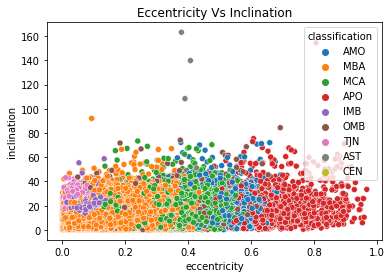

In [98]:
scatter_plot = sns.scatterplot(x='eccentricity',y='inclination',hue='classification',data=astro_df)
scatter_plot.set_title('Eccentricity Vs Inclination')
plt.show()

<h3> Semi Major Axis and Period Years </h3>

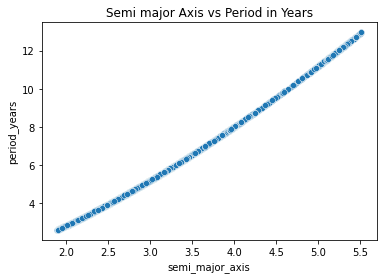

In [99]:
scatter_plot = sns.scatterplot(x='semi_major_axis',y='period_years',data=astro_df)
scatter_plot.set_title('Semi major Axis vs Period in Years')
plt.show()

<h3> Pha Flag and Absolute Magnitude </h3>

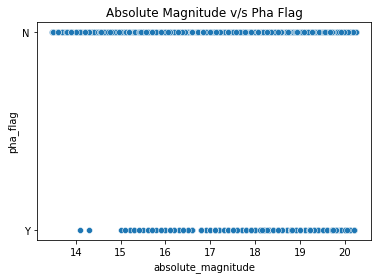

In [100]:
scatter_plot = sns.scatterplot(x='absolute_magnitude',y='pha_flag',data=astro_df)
scatter_plot.set_title('Absolute Magnitude v/s Pha Flag')
plt.show()

<h3> Perihelion and Aphelion with Classification as Hue </h3>

/Users/tanviranga/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


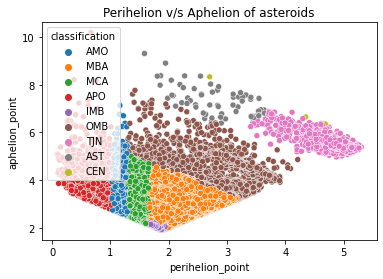

In [101]:
scatter_plot = sns.scatterplot(x='perihelion_point',y='aphelion_point',data=astro_df, hue='classification')
scatter_plot.set_title('Perihelion v/s Aphelion of asteroids')
plt.show()

<h3> Absolute Magnitude and MOID(Minimum Orbit Intersection Distance) with Near Earth Object as Hue</h3>

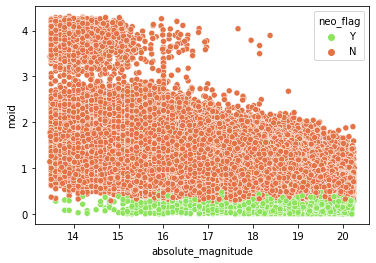

In [102]:
colors = ['#8EE35D', '#E37346']
sns.scatterplot(x="absolute_magnitude",y="moid",hue="neo_flag",data=astro_df,palette=colors)
plt.show()

<h3>Scatter Plot with Absolute Magnitude and MOID(Minimum Orbit Intersection Distance) with Potentially Hazardous Asteroid as Hue</h3>

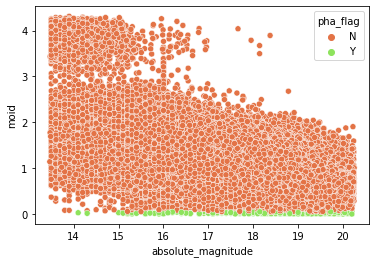

In [103]:
colors = ['#E37346', '#8EE35D']
sns.scatterplot(x="absolute_magnitude",y="moid",hue="pha_flag",data=astro_df,palette=colors)
plt.show()

<h3>Exploration of asteroids in the solar system </h3>

In [104]:
# Reference of information: https://nssdc.gsfc.nasa.gov/planetary/factsheet/
Orbit = namedtuple("Orbit", "eccentricity semi_major_axis inclination")
planets = {
    "Mercury": Orbit(0.206,  0.3871,  7.00),
    "Venus":   Orbit(0.007,  0.7233,  3.39),
    "Earth":   Orbit(0.017,  1.0000,  0.00),
    "Mars":    Orbit(0.093,  1.5273,  1.85),
    "Jupiter": Orbit(0.048,  5.2028,  1.31),
    "Saturn":  Orbit(0.056,  9.5388,  2.49),
    "Uranus":  Orbit(0.046, 19.1914,  0.77),
    "Neptune": Orbit(0.010, 30.0611,  1.77),
    "Pluto" :  Orbit(0.248, 39.5294, 17.15)
    }
# Calculation from reference: https://www.astronomynotes.com/history/s7.htm
perihelion_point = lambda a,e : a * (1 - e)
aphelion_point = lambda a,e : a * (1 + e)

In [105]:
# HYA or HYperbolic Asteroids are observed to have an orbit not bound to sun. Thus cannot calculate perihelion point and aphelion point for them.
# Reference: https://en.wikipedia.org/wiki/Hyperbolic_asteroid#:~:text=A%20hyperbolic%20asteroid%20is%20any,therefore%20have%20no%20cometary%20coma.
ellipticals = astro_df[ astro_df['classification'] != "HYA"][['semi_major_axis','eccentricity','classification']]
ellipticals['perihelion'] = perihelion_point( ellipticals['semi_major_axis'], ellipticals['eccentricity'])
ellipticals['aphelion'] = aphelion_point( ellipticals['semi_major_axis'], ellipticals['eccentricity'])

In [106]:
# Function to plot planets in the next graphs
def plot_planets(names=planets.keys(), params=(1,1,200)):
    ax = plt.gca()
    scale_x, scale_y, size = params
    for name in names:
        orbit = planets[name]
        perihelion = perihelion_point( orbit.semi_major_axis, orbit.eccentricity)
        aphelion = aphelion_point( orbit.semi_major_axis, orbit.eccentricity)
        plt.scatter( perihelion, aphelion, c='red', s=size)
        plt.text( scale_x*perihelion, scale_y*aphelion, name)

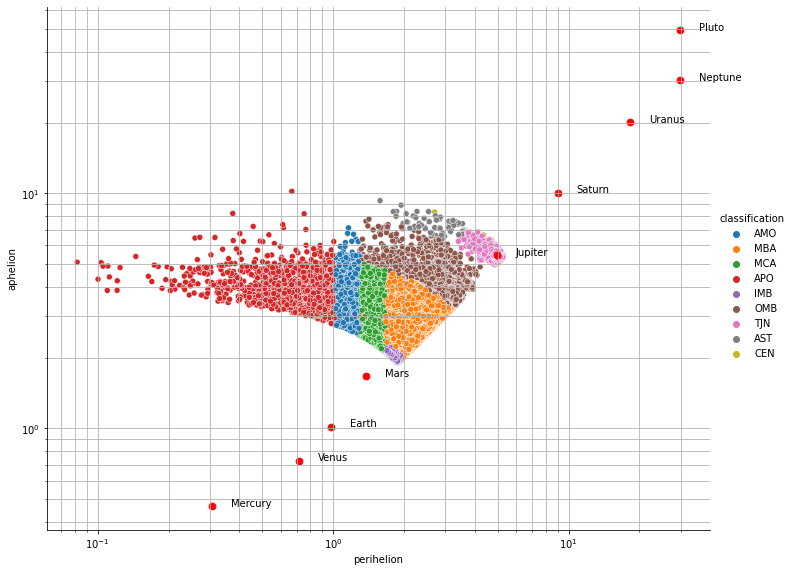

In [107]:
sns.relplot( data=ellipticals, x='perihelion',y='aphelion', hue='classification', height=8, aspect=10/8)
plot_planets(params=(1.2,1.0,45))

plt.minorticks_on()
plt.grid(which='both')
plt.xscale('log')
plt.yscale('log')
plt.show()

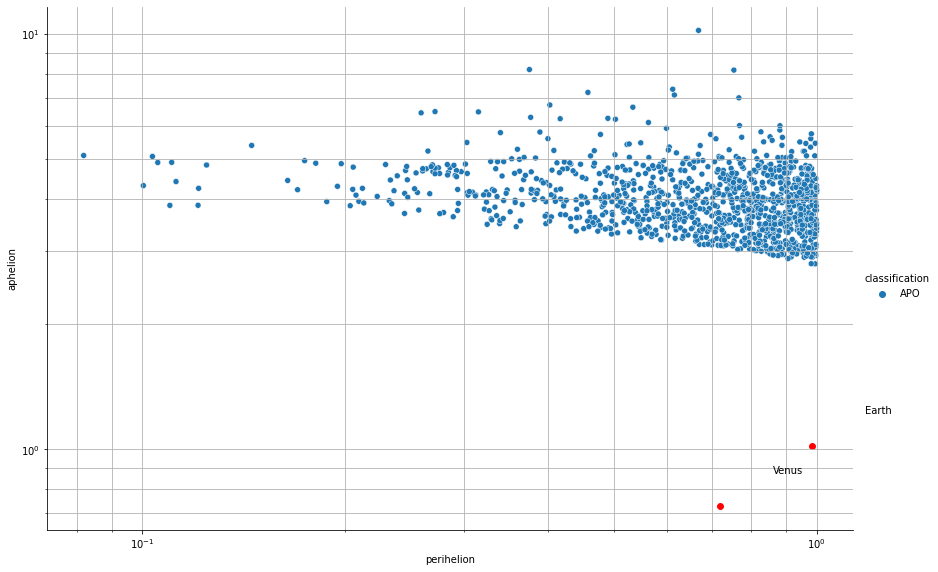

In [108]:
inner=ellipticals[ellipticals.perihelion < 1]
sns.relplot( data=inner, x='perihelion',y='aphelion', hue='classification', height=8, aspect=12/8)
plot_planets( ['Venus', 'Earth'], params=(1.2, 1.2, 35))
plt.minorticks_on()
plt.grid(which='both')
plt.xscale('log')
plt.yscale('log')
plt.show()

<h2> Step 4: PairPlots</h2>

<h3> Eccentricity, Inclination and Semi Major Axis </h3>

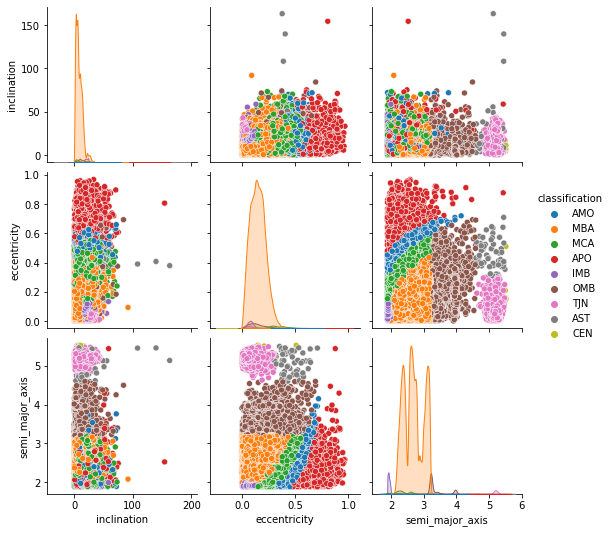

In [109]:
sns.pairplot(astro_df,vars=['inclination','eccentricity','semi_major_axis'], hue='classification')
plt.show()

<h3> Semi Major Axis, Period in years and Period Time </h3>

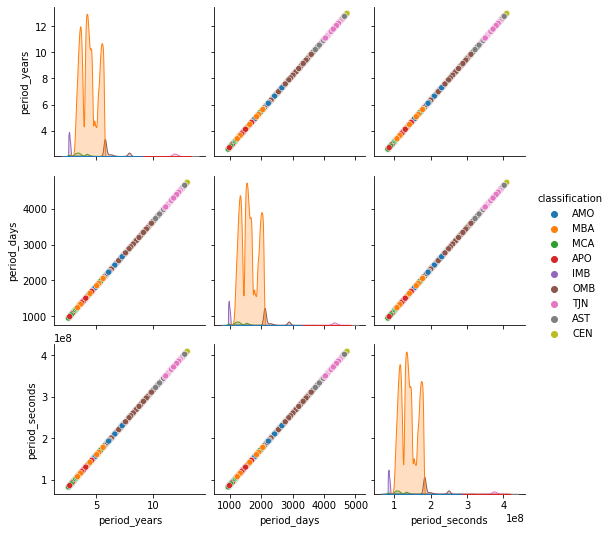

In [110]:
sns.pairplot(astro_df,vars=['period_years','period_days', 'period_seconds'], hue='classification')
plt.show()

<h2> Step 5: Bar Graphs and Histograms </h2>

<h3>Eccentricty of Asteroids</h3>

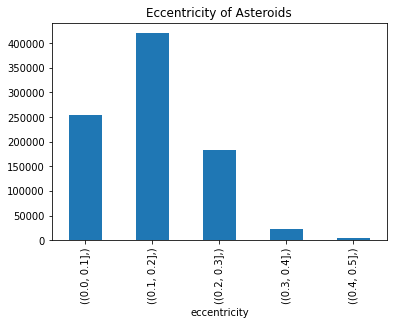

In [111]:
pd.DataFrame(
    pd.cut(astro_df['eccentricity'], [0,  0.1, 0.2, 0.3, 0.4, 0.5])
).sort_values('eccentricity').value_counts().sort_index().plot(kind="bar", title="Eccentricity of Asteroids")
plt.show()

<h3> Inclination of Asteroids </h3>

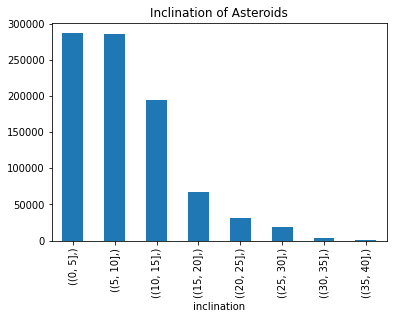

In [112]:
pd.DataFrame(
    pd.cut(astro_df['inclination'], [0, 5, 10, 15, 20, 25, 30, 35, 40])
).sort_values('inclination').value_counts().sort_index().plot(kind="bar", title="Inclination of Asteroids")
plt.show()

<h3> Asteroid Classes by Count </h3>

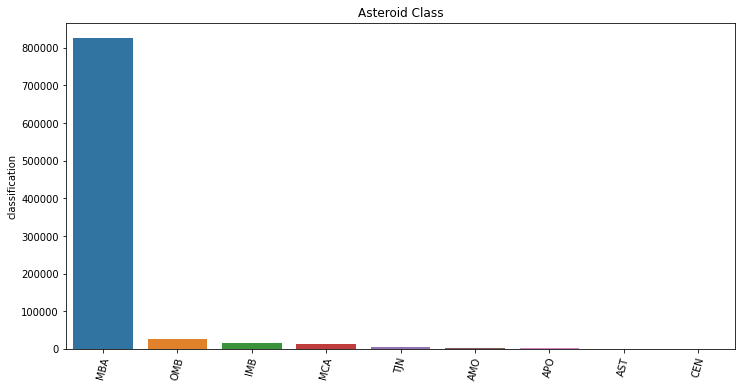

In [113]:
x=astro_df['classification'].value_counts()
x
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Asteroid Class")
sns.barplot(x=x.index, y=x)
plt.show()

<h3> Inclination </h3>

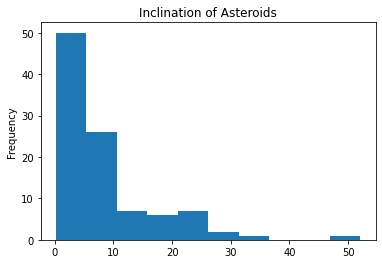

In [114]:
astro_df['inclination'] \
    .head(100) \
    .plot(kind='hist', title='Inclination of Asteroids')
plt.show()

<h3> Eccentricity </h3>

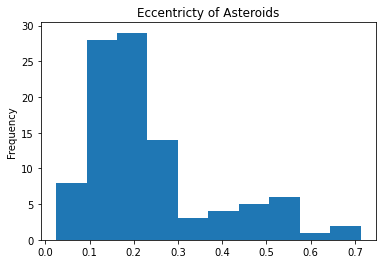

In [115]:
astro_df['eccentricity'] \
    .head(100) \
    .plot(kind='hist', title='Eccentricty of Asteroids')
plt.show()

<h3>Semi Major Axis</h3>

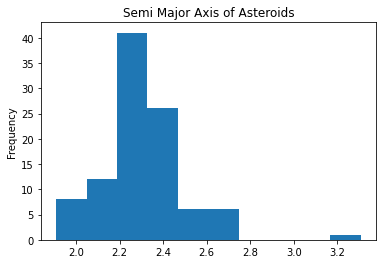

In [116]:
astro_df['semi_major_axis'] \
    .head(100) \
    .plot(kind='hist', title='Semi Major Axis of Asteroids')
plt.show()

<h3>Absolute Magnitude</h3>

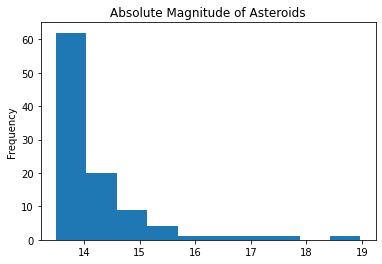

In [117]:
astro_df['absolute_magnitude'] \
    .head(100) \
    .plot(kind='hist', title='Absolute Magnitude of Asteroids')
plt.show()

<h3>Mean Motion</h3>

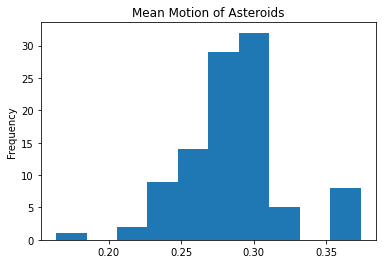

In [118]:
astro_df['mean_motion'] \
    .head(100) \
    .plot(kind='hist', title='Mean Motion of Asteroids')
plt.show()

<h3>Period Years</h3>

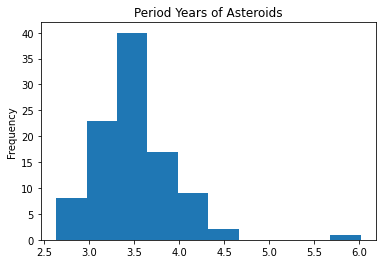

In [119]:
astro_df['period_years'] \
    .head(100) \
    .plot(kind='hist', title='Period Years of Asteroids')
plt.show()

<h2> Step 6: Bell Curves </h2>

<h3>Inclination</h3>

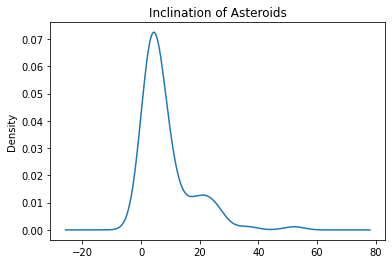

In [120]:
astro_df['inclination'] \
    .head(100) \
    .plot(kind='kde', title='Inclination of Asteroids')
plt.show()

<h3>Eccentricity</h3>

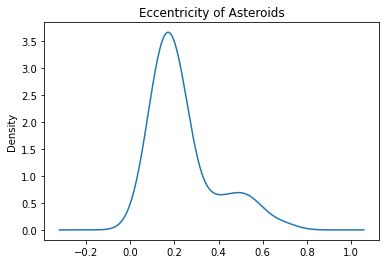

In [121]:
astro_df['eccentricity'] \
    .head(100) \
    .plot(kind='kde', title='Eccentricity of Asteroids')
plt.show()

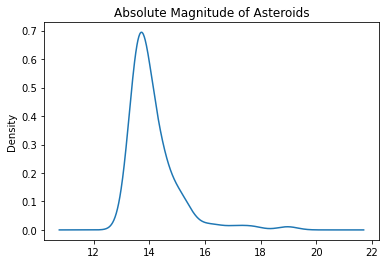

In [122]:
astro_df['absolute_magnitude'] \
    .head(100) \
    .plot(kind='kde', title='Absolute Magnitude of Asteroids')
plt.show()

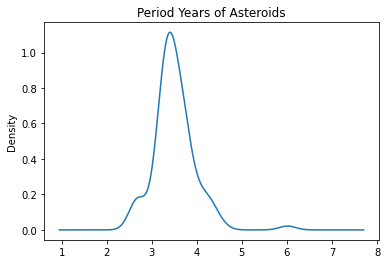

In [123]:
astro_df['period_years'] \
    .head(100) \
    .plot(kind='kde', title='Period Years of Asteroids')
plt.show()

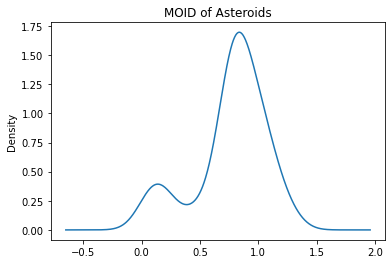

In [124]:
astro_df['moid'] \
    .head(100) \
    .plot(kind='kde', title='MOID of Asteroids')
plt.show()

<h2> Step 7: Pie Charts</h2>

<h3> Eccentricity </h3>

<AxesSubplot:title={'center':'Eccentricity'}, ylabel='eccentricity'>

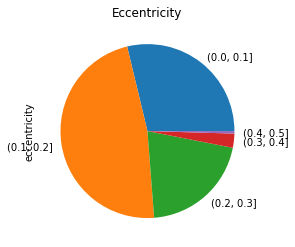

In [125]:
pd.DataFrame(
    pd.cut(astro_df['eccentricity'], [0, 0.1, 0.2, 0.3, 0.4, 0.5])
)["eccentricity"].value_counts().sort_index().plot(kind="pie", title="Eccentricity")

<h3> Inclination </h3>

<AxesSubplot:title={'center':'Inclination'}, ylabel='inclination'>

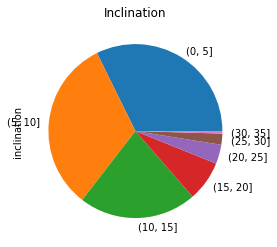

In [126]:
pd.DataFrame(
    pd.cut(astro_df['inclination'], [0, 5, 10, 15, 20, 25, 30, 35])
)["inclination"].value_counts().sort_index().plot(kind="pie", title="Inclination")

<h3> Absolute Magnitude </h3>

<AxesSubplot:title={'center':'Absolute Magnitude'}, ylabel='absolute_magnitude'>

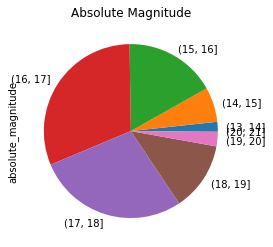

In [127]:
pd.DataFrame(
    pd.cut(astro_df['absolute_magnitude'], [13, 14, 15, 16, 17, 18, 19, 20, 21])
)["absolute_magnitude"].value_counts().sort_index().plot(kind="pie", title="Absolute Magnitude")

<h2> Step 8: Box Plots</h2>

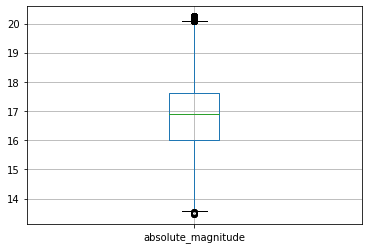

In [128]:
astro_df[['absolute_magnitude']].boxplot()
plt.show()

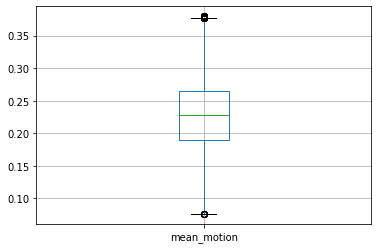

In [129]:
astro_df[['mean_motion']].boxplot()
plt.show()

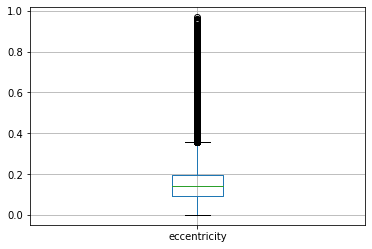

In [130]:
astro_df[['eccentricity']].boxplot()
plt.show()

<h2> Step 9: Percentile Plots </h2>

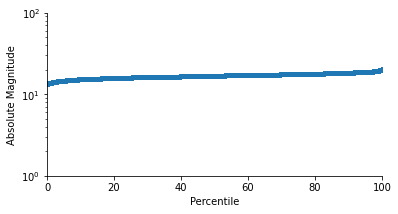

In [131]:
fig, ax = plt.subplots(figsize=(6, 3))
fig = probscale.probplot(astro_df['absolute_magnitude'], ax=ax, plottype='pp', datascale='log',
                         problabel='Percentile', datalabel='Absolute Magnitude',
                         scatter_kws=dict(marker='.', linestyle='none', label='Absolute Magnitude of Asteroids'))
ax.set_ylim(bottom=1, top=100)
sns.despine()
plt.show()

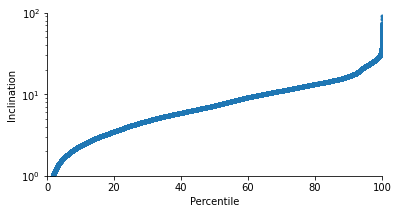

In [132]:
fig, ax = plt.subplots(figsize=(6, 3))
fig = probscale.probplot(astro_df['inclination'], ax=ax, plottype='pp', datascale='log',
                         problabel='Percentile', datalabel='Inclination',
                         scatter_kws=dict(marker='.', linestyle='none', label='Inclination'))
ax.set_ylim(bottom=1, top=100)
sns.despine()
plt.show()

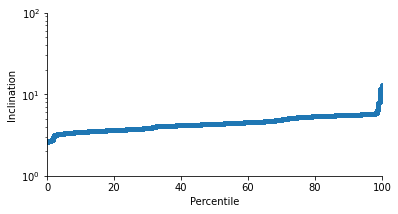

In [133]:
fig, ax = plt.subplots(figsize=(6, 3))
fig = probscale.probplot(astro_df['period_years'], ax=ax, plottype='pp', datascale='log',
                         problabel='Percentile', datalabel='Inclination',
                         scatter_kws=dict(marker='.', linestyle='none', label='period_years'))
ax.set_ylim(bottom=1, top=100)
sns.despine()
plt.show()

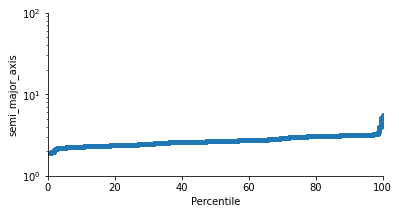

In [134]:
fig, ax = plt.subplots(figsize=(6, 3))
fig = probscale.probplot(astro_df['semi_major_axis'], ax=ax, plottype='pp', datascale='log',
                         problabel='Percentile', datalabel='semi_major_axis',
                         scatter_kws=dict(marker='.', linestyle='none', label='period_years'))
ax.set_ylim(bottom=1, top=100)
sns.despine()
plt.show()

<h2>Step 10: Stem Plot </h2>

<h3>x=absolute_magnitude y=Potentially hazardous Asteroid</h3>

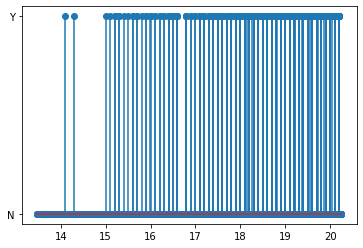

In [135]:
plt.stem(astro_df['absolute_magnitude'], astro_df['pha_flag'])
plt.show()

<h2> x=semi_major_axis y=period_years </h2>

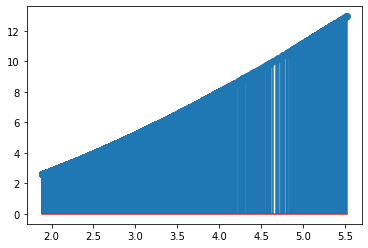

In [136]:
plt.stem(astro_df['semi_major_axis'], astro_df['period_years'])
plt.show()

<h2> Step 11: Correlattion of Columns </h2>

In [137]:
astro_df_corr = astro_df[['spkid', 'classification_numerical' ,'eccentricity', 'semi_major_axis', 'perihelion_distance',
       'inclination', 'mean_motion', 'time_of_perihelion_passage', 'period_seconds',
       'period_days', 'period_years', 'perihelion_point', 'aphelion_point']].dropna().corr()
astro_df_corr

,spkid,classification_numerical,eccentricity,semi_major_axis,perihelion_distance,inclination,mean_motion,time_of_perihelion_passage,period_seconds,period_days,period_years,perihelion_point,aphelion_point
spkid,1.000000,0.014026,-0.004227,0.035490,0.031135,0.013415,-0.032884,-0.007675,0.035428,0.035428,0.035428,0.031135,0.030772
classification_numerical,0.014026,1.000000,-0.043071,0.334034,0.289859,0.207656,-0.130932,-0.014702,0.375515,0.375515,0.375515,0.289859,0.292469
eccentricity,-0.004227,-0.043071,1.000000,-0.108229,-0.601232,0.127470,0.088819,-0.038145,-0.109352,-0.109352,-0.109352,-0.601232,0.359428
semi_major_axis,0.035490,0.334034,-0.108229,1.000000,0.855786,0.190853,-0.947330,0.013814,0.996227,0.996227,0.996227,0.855786,0.886277
perihelion_distance,0.031135,0.289859,-0.601232,0.855786,1.000000,0.079255,-0.799684,0.032952,0.854974,0.854974,0.854974,1.000000,0.518860
inclination,0.013415,0.207656,0.127470,0.190853,0.079255,1.000000,-0.158403,-0.041657,0.189952,0.189952,0.189952,0.079255,0.244418
mean_motion,-0.032884,-0.130932,0.088819,-0.947330,-0.799684,-0.158403,1.000000,-0.014654,-0.916996,-0.916996,-0.916996,-0.799684,-0.849470
time_of_perihelion_passage,-0.007675,-0.014702,-0.038145,0.013814,0.032952,-0.041657,-0.014654,1.000000,0.014139,0.014139,0.014139,0.032952,-0.006674
period_seconds,0.035428,0.375515,-0.109352,0.996227,0.854974,0.189952,-0.916996,0.014139,1.000000,1.000000,1.000000,0.854974,0.880770
period_days,0.035428,0.375515,-0.109352,0.996227,0.854974,0.189952,-0.916996,0.014139,1.000000,1.000000,1.000000,0.854974,0.880770


<h2> Step 12: Plot HeatMap </h2>

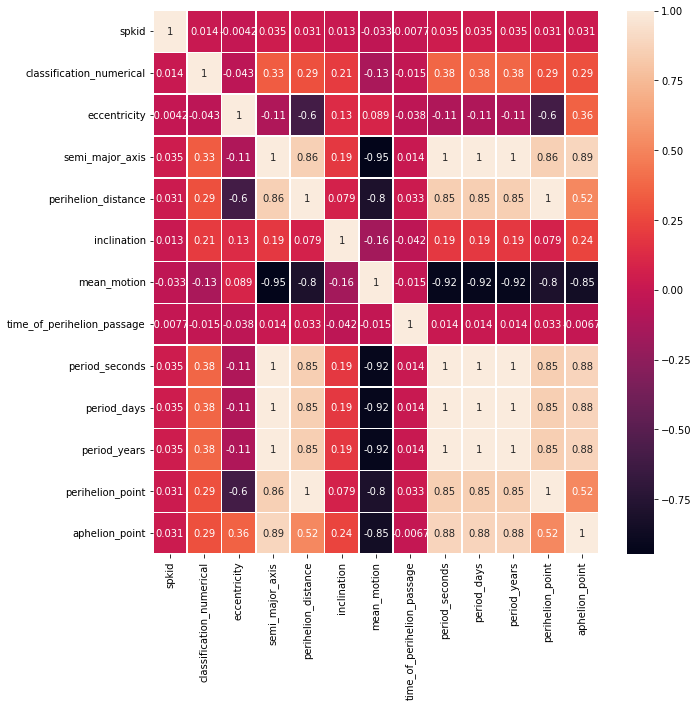

In [138]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(astro_df_corr, annot=True, linewidths=.5, ax=ax)
plt.show()

<h2>Step 13: Group Asteroids by classes</h2>

In [139]:
astro_df[['semi_major_axis','classification']].groupby('classification').agg('mean').sort_values(by='semi_major_axis')

,semi_major_axis
classification,
IMB,1.933299
MCA,2.360735
APO,2.361147
AMO,2.436203
MBA,2.681729
OMB,3.377694
AST,5.062244
TJN,5.195534
CEN,5.511272


In [140]:
 # Class Names to source reference 
Class_Names = {
        'AMO' : 'Amor',
        'APO' : 'Apollo',
        'AST' : 'Asteroid (other)',
        'CEN' : 'Centaur',
        'IMB' : 'Inner Main-belt Asteroid',
        'MBA' : 'Main-belt Asteroid',
        'MCA' : 'Mars Crossing Asteroid',
        'OMB' : 'Outer Main-belt Asteroid',
        'TJN' : 'Jupiter Trojan',
        }

# Finding the number of entries for each classification
class_summations = astro_df['classification'].value_counts()

# Summarising the entries with actual class names
pd.DataFrame({
        'classification': class_summations.index,
        'count':class_summations,
        'class_name' : class_summations.index.map( Class_Names)
    }).reset_index(drop=True)

,classification,count,class_name
0,MBA,825852,Main-belt Asteroid
1,OMB,26533,Outer Main-belt Asteroid
2,IMB,14505,Inner Main-belt Asteroid
3,MCA,13492,Mars Crossing Asteroid
4,TJN,5154,Jupiter Trojan
5,AMO,1657,Amor
6,APO,1196,Apollo
7,AST,69,Asteroid (other)
8,CEN,4,Centaur


In [141]:
astro_df[['period_years','classification']].groupby('classification').agg('mean').sort_values(by='period_years').dropna()

,period_years
classification,
IMB,2.688386
MCA,3.644061
APO,3.657458
AMO,3.830969
MBA,4.412025
OMB,6.223524
AST,11.400317
TJN,11.843731
CEN,12.938571


In [142]:
# According to scatter plot, these classes of asteroids were the closest to the earth
print("Total count of Apollos and Amor")
display( astro_df['classification'].value_counts()[['APO', 'AMO'] ] )

print("\nCounts of Potentially Hazardous Asteroids")
PHAs = astro_df[ (astro_df.pha_flag == 'Y')][['classification', 'eccentricity','semi_major_axis']]
display( PHAs['classification'].value_counts())

Total count of Apollos and Amor


APO    1196
AMO    1657
Name: classification, dtype: int64


Counts of Potentially Hazardous Asteroids


APO    406
AMO     47
Name: classification, dtype: int64

In [143]:
print("Counts of Near Earth Objects")
PHAs = astro_df[ (astro_df.neo_flag == 'Y')][['classification', 'eccentricity','semi_major_axis']]
display( PHAs['classification'].value_counts())

Counts of Near Earth Objects


AMO    1657
APO    1196
Name: classification, dtype: int64

In [144]:
# The End...